In [2]:
import pandas as pd

It seems like you've got a clear task ahead of you! Let's break down the steps you need to take for this assignment:

1. **Data Preparation**:
   - Start by loading the dataset into your preferred data analysis environment (e.g., Python with pandas).
   - Inspect the dataset to understand its structure, check for missing values, and identify the features and target variable.
   - Convert the 'Connect_Date' column to a datetime format for further analysis.
   - You may also need to preprocess the data, such as encoding categorical variables and handling any outliers or anomalies.

2. **Train-Validation Split**:
   - Split the dataset into training and validation sets. Since you're supposed to create your validation set, you can use techniques like stratified sampling to ensure that both sets have a similar distribution of classes (churned vs. not churned).
   - It's essential to keep the validation set separate from the training set to evaluate the performance of your predictive model properly.

3. **Model Selection**:
   - Choose appropriate machine learning algorithms for binary classification. Common choices include logistic regression, random forests, gradient boosting, and support vector machines.
   - Experiment with different models and hyperparameters to find the best performing one for your task.

4. **Model Evaluation**:
   - Evaluate the performance of your model using the two specified metrics: profit @ top-20 and AUC.
   - For profit @ top-20, you'll need to predict churn probabilities for all customers in the validation set, rank them based on these probabilities, and calculate the accumulated profitability for the top 20 predicted churners.
   - For AUC, you can use standard evaluation functions provided by libraries like scikit-learn in Python.

5. **Addressing Class Imbalance**:
   - Since the dataset may suffer from class imbalance (i.e., fewer instances of churned customers compared to non-churned ones), consider techniques like oversampling, undersampling, or using class weights to handle this imbalance.
   - Be mindful that the class imbalance and the specific evaluation metric (profit @ top-20) will present challenges that you'll need to address during modeling and evaluation.

6. **Iteration and Optimization**:
   - Iterate on your model by fine-tuning hyperparameters, feature engineering, or trying different algorithms to improve performance.
   - Optimize your model for both the profit @ top-20 and AUC metrics, balancing between the two as needed.

By following these steps and iterating on your approach, you should be able to construct a predictive model to predict telco customer churn effectively. Remember to document your process and results thoroughly for your assignment. Good luck!

# step 1
1. load the dataset and 
Inspect the dataset to understand its structure, check for missing values, and identify the features and target variable.

In [94]:

traindata = pd.read_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/train.csv')


In [50]:
traindata

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,F,16.0,15/09/97,37.433333,2.0,CAT 200,ASAD90,151.0,1169.400001,201.0,...,OK,0.130433,0.615895,0.346500,0.037605,0.127974,F,F,1,K192650
5040,F,29.0,28/09/96,49.166667,1.0,CAT 100,CAS30,135.0,405.600000,124.0,...,OK,0.189112,0.555769,0.412716,0.031515,0.238615,F,F,1,K295600
5041,M,23.0,08/06/99,16.400000,0.0,CAT 200,BS110,566.0,2382.000000,4.0,...,OK,0.112657,0.810121,0.162330,0.027548,0.043094,F,F,0,K366420
5042,M,46.0,01/03/98,31.866667,2.0,Play 100,S50,72.0,112.200000,31.0,...,OK,0.205957,0.323250,0.664650,0.012100,0.171451,F,F,1,K219850


In [95]:
# show rows that contain missing data
missing_data_rows = traindata[traindata.isnull().any(axis=1)]
missing_data_rows


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
1736,F,48.0,26/07/98,26.966667,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244380
3237,F,34.0,22/03/97,43.333333,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244320
3836,M,21.0,03/01/96,58.133333,2.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K213590
4301,F,22.0,08/08/98,26.533333,5.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K212820


In [96]:
# drop rows with missing data from traindata because only 4 rows of missing data
traindata = traindata.dropna()


## Train Test Split

In [97]:
# Define 'X' and 'y' variables
X = traindata.drop('target', axis=1)
y = traindata['target']

##  Stratified Splitting:
 Ensure that both the training and validation sets have a similar class distribution as the original dataset. This is particularly important for imbalanced datasets, such as predicting customer churn.

In [98]:
from sklearn.model_selection import train_test_split

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

 # test_size=0.2 splits the data into training and validation sets with a 80-20 ratio, 
#stratify=y_resampled ensures that both sets have similar class distributions
# random_state=42 ensures reproducibility of the split. 

In [99]:
# List all the columns in the traindata that are of type object (text string) or category
categorical_text_columns = traindata.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_text_columns)


['Gender', 'Connect_Date', 'tariff', 'Handset', 'Usage_Band', 'Tariff_OK', 'high Dropped calls', 'No Usage', 'id']


### Understand categorical / text columns

In [65]:
# Print the unique values of the 'Usage_Band', 'high Dropped calls', 'No Usage', 'tariff', 'Handset', and 'Tariff_OK' columns in the 'traindata' DataFrame
print("Unique values in 'Gender':", traindata['Gender'].unique())
# Print the first row of 'Connect_Date'
print("First row of 'Connect_Date':", traindata['Connect_Date'].iloc[0])
print("Unique values in 'tariff':", traindata['tariff'].unique())
print("Unique values in 'Handset':", traindata['Handset'].unique())
print("Unique values in 'Usage_Band':", traindata['Usage_Band'].unique())
print("Unique values in 'Tariff_OK':", traindata['Tariff_OK'].unique())
print("Unique values in 'high Dropped calls':", traindata['high Dropped calls'].unique())
print("Unique values in 'No Usage':", traindata['No Usage'].unique())


Unique values in 'Gender': ['F' 'M']
First row of 'Connect_Date': 20/05/98
Unique values in 'tariff': ['Play 100' 'CAT 100' 'CAT 50' 'Play 300' 'CAT 200']
Unique values in 'Handset': ['BS210' 'ASAD90' 'WC95' 'BS110' 'S50' 'S80' 'CAS30' 'CAS60' 'ASAD170'
 'SOP10' 'SOP20']
Unique values in 'Usage_Band': ['Med' 'MedLow' 'MedHigh' 'High' 'Low' nan]
Unique values in 'Tariff_OK': ['OK' 'High CAT 100' 'High CAT 50' 'High Play 100']
Unique values in 'high Dropped calls': ['F' 'T']
Unique values in 'No Usage': ['F' 'T']


 ## encoding categorical variables and text 
- gender: 0 / 1 as label encoder
- Connect_Date: set the earliest day in this column as 1, and the following days add on to that earliest day. For example, if you have a date "01/01/21", you could represent it as 1, "02/01/21" as 2, and so on.
- Usage_Band:  encode it as Low as 1, MedLow is 2, Med is 3, MedHigh is 4 and High is 5
- high Dropped calls: Label encoder
- "No Usage" only contains one value 'F', so we drop it 
- ID: drop the column
- tariff, Handset and Tariff_OK: use the Weight of Evidence (WOE) Encoder from the category_encoders library to encode

In [100]:
#encode Gender column
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Transform the 'Gender' column
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])

# Convert 'Connect_Date' to datetime format
X_train['Connect_Date'] = pd.to_datetime(X_train['Connect_Date'])
# Subtract the minimum date from all the dates in the 'Connect_Date' column and add 1
X_train['Connect_Date'] = (X_train['Connect_Date'] - X_train['Connect_Date'].min()).dt.days + 1

#encode Usage_Band column
usage_band_mapping = {'Low': 1, 'MedLow': 2, 'Med': 3, 'MedHigh': 4, 'High': 5}
# Apply the mapping to the 'Usage_Band' column
X_train['Usage_Band'] = X_train['Usage_Band'].map(usage_band_mapping)

# Use the LabelEncoder that's already defined to encode the 'high Dropped calls' column in X_train
X_train['high Dropped calls'] = label_encoder.fit_transform(X_train['high Dropped calls'])

#If the column "No Usage" only contains one value 'F', indicating that all customers have used the service, 
#In this case, it can be safely removed from the model because it does not contribute to the variability 
X_train = X_train.drop('No Usage', axis=1)

#ID is not useful for prediction, so drop it
X_train = X_train.drop('id', axis=1)

# Encode 'tariff', 'Handset', 'Tariff_OK' columns
X_train['tariff'] = label_encoder.fit_transform(X_train['tariff'])
X_train['Handset'] = label_encoder.fit_transform(X_train['Handset'])
X_train['Tariff_OK'] = label_encoder.fit_transform(X_train['Tariff_OK'])


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_5543/3558733282.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train['Connect_Date'] = pd.to_datetime(X_train['Connect_Date'])


In [101]:
#encode Gender column
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Transform the 'Gender' column
X_val['Gender'] = label_encoder.fit_transform(X_val['Gender'])

# Convert 'Connect_Date' to datetime format
X_val['Connect_Date'] = pd.to_datetime(X_val['Connect_Date'])
# Subtract the minimum date from all the dates in the 'Connect_Date' column and add 1
X_val['Connect_Date'] = (X_val['Connect_Date'] - X_val['Connect_Date'].min()).dt.days + 1

#encode Usage_Band column
usage_band_mapping = {'Low': 1, 'MedLow': 2, 'Med': 3, 'MedHigh': 4, 'High': 5}
# Apply the mapping to the 'Usage_Band' column
X_val['Usage_Band'] = X_val['Usage_Band'].map(usage_band_mapping)

# Use the LabelEncoder that's already defined to encode the 'high Dropped calls' column in X_val
X_val['high Dropped calls'] = label_encoder.fit_transform(X_val['high Dropped calls'])

#If the column "No Usage" only contains one value 'F', indicating that all customers have used the service, 
#In this case, it can be safely removed from the model because it does not contribute to the variability 
X_val = X_val.drop('No Usage', axis=1)

#ID is not useful for prediction, so drop it
X_val = X_val.drop('id', axis=1)

# Encode 'tariff', 'Handset', 'Tariff_OK' columns
X_val['tariff'] = label_encoder.fit_transform(X_val['tariff'])
X_val['Handset'] = label_encoder.fit_transform(X_val['Handset'])
X_val['Tariff_OK'] = label_encoder.fit_transform(X_val['Tariff_OK'])



/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_5543/51842082.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_val['Connect_Date'] = pd.to_datetime(X_val['Connect_Date'])


import category_encoders as ce
# use the Weight of Evidence (WOE) Encoder from the category_encoders library to encode tariff, Handset and Tariff_OK.
encoder = ce.WOEEncoder(cols=['tariff', 'Handset', 'Tariff_OK'])

encoder.fit(X_val, y_val)
X_val = encoder.transform(X_val)

In [102]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (4032, 36)
Shape of y_train: (4032,)
Shape of X_val: (1008, 36)
Shape of y_val: (1008,)


In [103]:
X_train

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,actual call cost,Total_call_cost,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls
4872,0,18.0,1187,21.566667,2.0,0,3,260.0,774.600000,41.0,...,48.927219,65.312209,170.312209,0,0.164789,0.791296,0.184186,0.024517,0.055794,0
4332,0,19.0,652,36.500000,0.0,4,0,26.0,141.600000,290.0,...,0.000000,105.505859,183.445859,3,0.172304,0.176801,0.783244,0.039955,0.329335,0
491,0,32.0,855,30.700000,2.0,0,3,286.0,839.400001,39.0,...,47.028996,77.045595,182.045595,0,0.175558,0.895933,0.072687,0.031380,0.106794,0
1866,1,42.0,836,30.366667,2.0,1,6,311.0,1969.800000,18.0,...,94.433071,272.325682,422.325682,3,0.151454,0.897199,0.055887,0.046914,0.270087,0
4097,1,27.0,1332,13.833333,2.0,4,6,49.0,178.200000,213.0,...,0.000000,54.396154,132.336154,3,0.134312,0.209820,0.667962,0.122218,0.160121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1,22.0,931,27.200000,1.0,0,2,221.0,424.800001,6.0,...,16.877240,48.388935,153.388935,3,0.177464,0.559463,0.348874,0.091663,0.138337,0
4530,0,16.0,991,25.200000,1.0,3,3,152.0,356.400000,115.0,...,19.375841,21.791891,81.731891,2,0.110832,0.487285,0.392125,0.120591,0.008258,0
778,1,64.0,657,36.333333,1.0,3,3,23.0,140.400000,15.0,...,0.000000,42.590573,102.530573,3,0.230781,0.415631,0.495560,0.088810,0.315206,0
917,1,17.0,1141,20.200000,0.0,1,0,575.0,898.800000,4.0,...,0.000000,67.837719,217.837719,3,0.153566,0.753774,0.231969,0.014257,0.189639,0


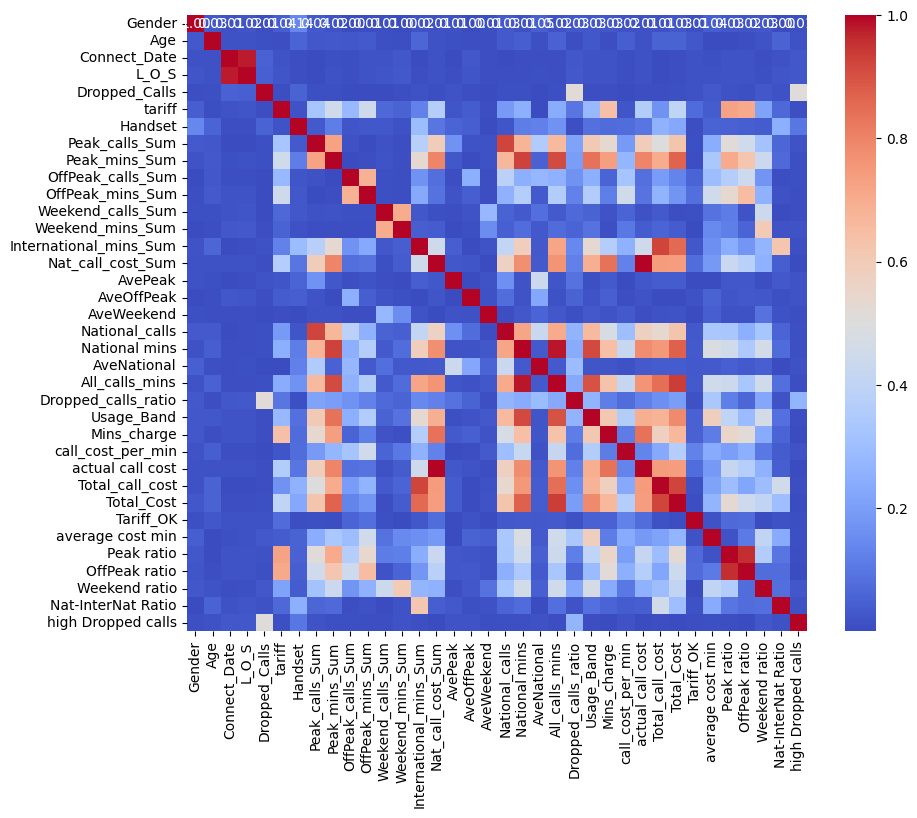

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Get absolute values of correlation matrix
abs_corr_matrix = correlation_matrix.abs()

plt.figure(figsize=(10, 8))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



Due to the high correlation, we are going to drop some columns
- Connect_Date
- Nat_call_cost_Sum
- OffPeak ratio 
- All_calls_mins
- Peak_mins_Sum 
- Peak_calls_Sum
- International_mins_Sum
- Nat_call_cost_Sum
- actual call cost
- 'Total_call_cost'
- National mins
- OffPeak_calls_Sum
- Weekend_calls_Sum

In [110]:
# columns to be dropped
columns_to_drop = ['Connect_Date', 'Nat_call_cost_Sum', 'OffPeak ratio', 'All_calls_mins', 
                   'Peak_mins_Sum', 'Peak_calls_Sum', 'International_mins_Sum', 
                   'Nat_call_cost_Sum', 'actual call cost', 'Total_call_cost', 'National mins', 'OffPeak_calls_Sum', 'Weekend_calls_Sum']

# drop the columns from X_train
X_train_rf = X_train.drop(columns=columns_to_drop)

# drop the columns from X_val
X_val_rf = X_val.drop(columns=columns_to_drop)

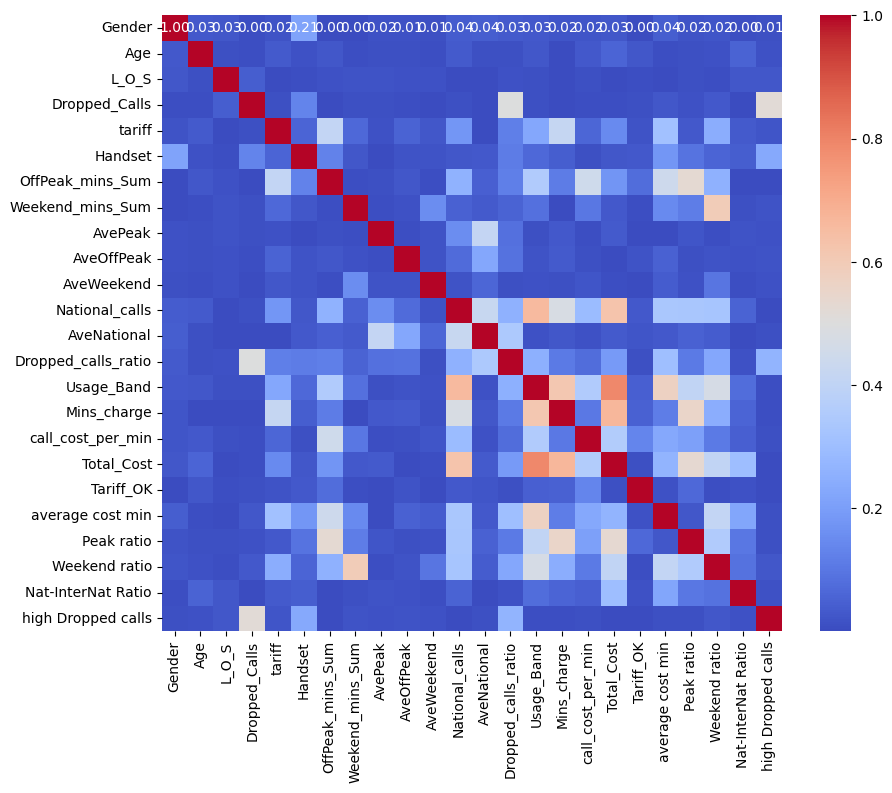

In [71]:
correlation_matrix = X_train.corr()

# Get absolute values of correlation matrix
abs_corr_matrix = correlation_matrix.abs()

plt.figure(figsize=(10, 8))
sns.heatmap(abs_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# resample
Given the class imbalance in the target variable, implement SMOTE resampling techniques to address class imbalance

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)


In [106]:
#perform SMOTE resampling on the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [172]:
X_resampled_rf, y_resampled_rf = smote.fit_resample(X_train_rf, y_train)

# Model Selection:

- logistic regression
-  random forests
-  gradient boosting

### random forests

In churn analysis using a random forest model, the random forest algorithm learns patterns from the training data to predict whether a customer is likely to churn (i.e., leave the service) based on various features or attributes associated with the customer.
It leverages an ensemble of decision trees to make accurate and robust predictions about customer churn.


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#add hyperparameters tuning to the RandomForestClassifier

# Define the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_resampled_rf, y_resampled_rf)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

# Fit the new model to the training data
rf_best.fit(X_resampled_rf, y_resampled_rf)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_dep

RandomForestClassifier(max_depth=20, min_samples_split=5)



- **AUC Score**: The AUC score is a metric used to evaluate the performance of a binary classification model. It quantifies the classifier's ability to distinguish between positive and negative classes across different threshold values.
  
- **Interpretation of AUC Score**:
  - AUC score ranges from 0 to 1, where a score closer to 1 indicates better performance.
  - An AUC score of 1 means the model achieved perfect discrimination, separating all positive and negative instances perfectly.
  - An AUC score of 0.5 indicates that the model performs no better than random guessing.
  - A score above 0.5 suggests that the model has some predictive capability, with higher values indicating better discrimination.


In [40]:
from sklearn.metrics import roc_auc_score

# Assuming that 'rf' is your RandomForestClassifier model and 'y_val' is your validation target data
y_pred_proba = rf_best.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"AUC Score: {auc_score}")


AUC Score: 0.9325030666218719


In [ ]:

    # Create a DataFrame with the predicted probabilities and the 'average cost min' feature
    df_pred = pd.DataFrame({'Churn_Probability': y_pred_proba, 'average_cost_min': X_val['average cost min']})

    # Sort the DataFrame by the predicted probabilities of churn in descending order
    df_pred_sorted = df_pred.sort_values(by='Churn_Probability', ascending=False)

    # Select the top 20 customers with the highest predicted probabilities of churn
    df_pred_top20 = df_pred_sorted.head(20)

print(df_pred_top20)

    # Calculate the sum of the 'average cost min' for these top 20 customers
    potential_profitability = df_pred_top20['average_cost_min'].sum()

    print("The potential profitability that could be retained by targeting the top 20 customers for retention efforts or incentives is:", potential_profitability)



In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

# Assuming that 'rf' is your trained RandomForestClassifier model
# and 'X_val' is your validation dataset

result = permutation_importance(rf, X_val, y_val, n_repeats=40, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_val.columns[sorted_idx])
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()


# Gradient boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
# import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

## XG Boosting

In [127]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Create a XGBoost classifier
xgb_clf = XGBClassifier()

# Create the GridSearchCV object
xgb_model = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
xgb_model.fit(X_resampled, y_resampled)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=None, n_estimators=50, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_d

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 5, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [128]:
from sklearn.metrics import roc_auc_score
# Predict the target value using the GridSearchCV object and the X_val data
y_pred = xgb_model.predict(X_val)

# Generate AUC score
auc_score = roc_auc_score(y_val, y_pred)
auc_score


0.8477275745950887

In [126]:
X_val.shape

(1008, 36)

/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AAassignments/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:06:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


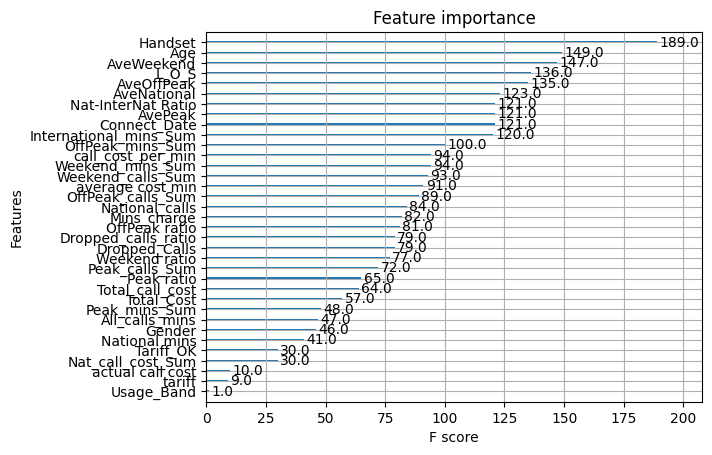

In [109]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Instantiate XGBClassifier with the best parameters
xgb_clf = XGBClassifier(**best_params)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgb_clf)
plt.show()


# Logistics Regression
sensitive to correlative features and curse of dimensionality

In [ ]:
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Scale the data
#The StandardScaler standardizes features by removing the mean and scaling to unit variance. 
#The standard score of a sample x is calculated as z = (x - u) / s, where u is the mean of the training samples, and s is the standard deviation of the training samples.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the logistic regression model with increased number of iterations
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
logistic_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the validation set: y_pred
y_pred = logistic_model.predict(X_val)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Compute and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ", accuracy)


# Import and test on test file

In [164]:


# Read the CSV data file
df_test = pd.read_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/test.csv')


In [161]:
df_test

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,id
0,F,20.0,23/05/96,55.582251,3.0,CAT 200,WC95,513.0,1075.667903,110.0,...,167.242853,OK,0.116924,0.824189,0.173365,0.009823,0.020349,F,F,K751808
1,F,54.0,01/03/98,32.067010,0.0,Play 300,BS110,13.0,378.078657,93.0,...,136.404621,OK,0.120457,0.415020,0.532898,0.022391,0.124480,F,F,K837351
2,F,28.0,11/10/98,26.621954,0.0,CAT 200,ASAD170,1000.0,2064.343139,90.0,...,397.739114,OK,0.149435,0.960100,0.034434,0.006660,0.225763,F,F,K548114
3,F,26.0,12/08/98,27.652735,5.0,CAT 200,WC95,122.0,999.111887,126.0,...,196.789012,OK,0.137372,0.745483,0.263256,0.005870,0.108872,F,F,K736156
4,F,34.0,28/10/98,25.479355,0.0,CAT 100,WC95,164.0,742.647381,73.0,...,160.450386,OK,0.180704,0.771754,0.166995,0.056390,0.090896,F,F,K508080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,F,32.0,20/06/97,40.097166,0.0,CAT 200,BS110,617.0,1412.608159,8.0,...,208.523608,OK,0.122342,0.883990,0.012611,0.070297,0.035339,F,F,K588314
1678,M,19.0,27/12/98,22.594431,0.0,CAT 100,BS110,198.0,685.503276,-1.0,...,147.689743,OK,0.163502,0.890952,0.052157,0.041489,0.079988,F,F,K826807
1679,F,34.0,25/03/96,55.339646,0.0,CAT 200,S50,546.0,1945.834456,21.0,...,302.935896,OK,0.127485,0.887100,0.106429,0.011459,0.098248,F,F,K982731
1680,M,21.0,16/02/97,42.830741,2.0,CAT 100,BS110,255.0,419.242872,76.0,...,159.088917,OK,0.205830,0.698567,0.358159,0.017720,0.256554,F,F,K623037


In [162]:
# Find the columns that contain missing values
missing_cols = df_test.columns[df_test.isnull().any()].tolist()
missing_cols


['Dropped_calls_ratio', 'Usage_Band', 'call_cost_per_min']

In [165]:
# Fill missing values in 'Dropped_calls_ratio', 'Usage_Band', 'call_cost_per_min' with their respective mean
df_test['Dropped_calls_ratio'].fillna(df_test['Dropped_calls_ratio'].mean(), inplace=True)
df_test['call_cost_per_min'].fillna(df_test['call_cost_per_min'].mean(), inplace=True)

df_test['Usage_Band'].fillna(df_test['Usage_Band'].mode()[0], inplace=True)


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_5543/918167567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Dropped_calls_ratio'].fillna(df_test['Dropped_calls_ratio'].mean(), inplace=True)
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_5543/918167567.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [166]:
dftest = df_test.copy()

## encode test file

In [167]:
#encode Gender column
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Transform the 'Gender' column
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

# Convert 'Connect_Date' to datetime format
df_test['Connect_Date'] = pd.to_datetime(df_test['Connect_Date'])
# Subtract the minimum date from all the dates in the 'Connect_Date' column and add 1
df_test['Connect_Date'] = (df_test['Connect_Date'] - df_test['Connect_Date'].min()).dt.days + 1

#encode Usage_Band column
usage_band_mapping = {'Low': 1, 'MedLow': 2, 'Med': 3, 'MedHigh': 4, 'High': 5}
# Apply the mapping to the 'Usage_Band' column
df_test['Usage_Band'] = df_test['Usage_Band'].map(usage_band_mapping)

# Use the LabelEncoder that's already defined to encode the 'high Dropped calls' column in df_test
df_test['high Dropped calls'] = label_encoder.fit_transform(df_test['high Dropped calls'])

#If the column "No Usage" only contains one value 'F', indicating that all customers have used the service, 
#In this case, it can be safely removed from the model because it does not contribute to the variability 
df_test = df_test.drop('No Usage', axis=1)

#ID is not useful for prediction, so drop it
df_test = df_test.drop('id', axis=1)

# Encode 'tariff', 'Handset', 'Tariff_OK' columns
df_test['tariff'] = label_encoder.fit_transform(df_test['tariff'])
df_test['Handset'] = label_encoder.fit_transform(df_test['Handset'])
df_test['Tariff_OK'] = label_encoder.fit_transform(df_test['Tariff_OK'])


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_5543/1099634066.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Connect_Date'] = pd.to_datetime(df_test['Connect_Date'])


## test file on random forest model

In [ ]:
# 'rf' is RandomForestClassifier model and 'test_cleaned' is the test dataset
# 'id' column is dropped before prediction

test_cleaned_without_id = test_cleaned.drop(columns=['id'])
predictions = rf.predict(test_cleaned_without_id)
print(predictions)

In [ ]:
# Assuming 'id' is a column in the 'test_cleaned' DataFrame
output = pd.DataFrame({'id': test['id'], 'predictions': predictions})
output.to_csv('predictions_rf.csv', index=False)


## test file on XGBoosting

In [170]:

predictions = xgb_model.predict(df_test)


In [171]:
# Assuming 'id' is a column in the 'test_cleaned' DataFrame
output = pd.DataFrame({'id': dftest['id'], 'predictions': predictions})


In [ ]:
output.to_csv('predictions_xgb.csv', index=False)

## test file on logistics regression

In [ ]:

# Drop the 'id' column from the test_cleaned DataFrame
test_cleaned = test_cleaned.drop(columns=['id'])

In [ ]:
# ['call_cost_per_min'] ['call_cost_per_min']
# calculate the mean of the columns
mean_dropped_calls_ratio = test_cleaned['Dropped_calls_ratio'].mean()
mean_call_cost_per_min = test_cleaned['call_cost_per_min'].mean()

# replace nan values with the mean
test_cleaned['Dropped_calls_ratio'].fillna(mean_dropped_calls_ratio, inplace=True)
test_cleaned['call_cost_per_min'].fillna(mean_call_cost_per_min, inplace=True)


In [ ]:
# Assuming that 'test_cleaned' is a DataFrame that has been defined in your Jupyter Notebook and 'logistic_model' is the trained model

# Get the column indices for validation data
handset_index_val = test_cleaned.columns.get_loc('Handset')
dropped_calls_index_val = test_cleaned.columns.get_loc('Dropped_Calls')
dropped_calls_ratio_index_val = test_cleaned.columns.get_loc('Dropped_calls_ratio')

# Predict the probabilities for the target variable using the logistic model and the 'Handset', 'Dropped_Calls', and 'Dropped_calls_ratio' features of the test data
y_pred = logistic_model.predict(test_cleaned.iloc[:, [handset_index_val, dropped_calls_index_val, dropped_calls_ratio_index_val]])


In [ ]:
print(y_pred)

In [ ]:
# Assuming 'id' is a column in the 'test_cleaned' DataFrame
output = pd.DataFrame({'id': df_test['id'], 'predictions': y_pred})
output.to_csv('predictions_logistics.csv', index=False)